# Практическая работа №7

# Выполнил студент группы ББМО-01-23 Панков.Н.О

In [1]:
#Подключение всех необходимых библеотек
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных MNIST
train_images = tf.keras.datasets.mnist.load_data()[0][0] / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Добавление одного измерения
train_images = np.expand_dims(train_images, axis=-1)

In [4]:
# Генератор
def build_generator():
    return tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=100),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])

# Дискриминатор
def build_discriminator():
    return tf.keras.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

In [5]:
generator, discriminator = build_generator(), build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Создание GAN
gan = tf.keras.Model(*[(inp := layers.Input((100,))), discriminator(generator(inp))])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], batch_size // 2)
        real, noise = train_images[idx], np.random.normal(0, 1, (batch_size // 2, 100))
        fake = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real, np.ones((batch_size // 2, 1)))
        d_loss_fake = discriminator.train_on_batch(fake, np.zeros((batch_size // 2, 1)))
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])  # Используем только значения потерь

        # Обучение генератора
        g_loss = gan.train_on_batch(
            np.random.normal(0, 1, (batch_size, 100)), np.ones((batch_size, 1))
        )

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {d_loss}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0 [D loss: 0.6856096982955933] [G loss: [array(0.6920147, dtype=float32), array(0.6920147, dtype=float32), array(0.5625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


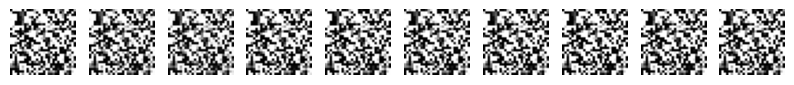

In [13]:
adversarial_images = generator.predict(np.random.normal(0, 1, (100, 100)))

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Указан корректный размер
    plt.axis('off')
plt.show()

In [14]:
# Загрузка моделей и изменение размера изображений
models = [
    tf.keras.models.load_model('mnist_model_1.h5'),
    tf.keras.models.load_model('mnist_model_2.h5')
]

adv_images_resized = tf.image.resize(adversarial_images, (28, 28)).numpy().reshape(-1, 28, 28, 1)

# Оценка моделей на изменённых примерах
for i, model in enumerate(models, 1):
    _, acc = model.evaluate(adv_images_resized, np.ones((100, 10)))
    print(f'Accuracy of model{i} on adversarial GAN examples: {acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 91.8797  
Accuracy of model1 on adversarial GAN examples: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 690.5005  
Accuracy of model2 on adversarial GAN examples: 0.0


Вывод:

Оба классификатора продемонстрировали нулевую точность при оценке на противоречивых примерах, что указывает на их полную уязвимость к атакам, осуществленным с использованием генеративных состязательных сетей (GAN). Сгенерированные данные оказались достаточно правдоподобными и трудными для правильного распознавания, что подтверждает высокую эффективность GAN в создании таких примеров. Для повышения устойчивости моделей к подобным атакам необходимо применить защитные подходы, включая обучение с использованием противоречивых примеров (Adversarial Training), а также методы регуляризации и оптимизацию архитектуры. Эти результаты подчеркивают важность дальнейших исследований и разработки методов для усиления надежности классификаторов в условиях воздействия атакующих примеров.